In [ ]:
impot numpy as np
from sklearn import preprocessing, cross_validation, neighbors
import pandas as pd
accuracies = []
for i in range(25):
    df = pd.read_csv('breas-cancer-wisconsin.data.txt')
    df.replace('?', -99999, inplace=True)
    df.drop(['id',1,inplace=True])

    X = np.array(df.drop(['class'],1))
    y = np.array(df['class'])

    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size = 0.2)

    clf = neighbors.KNeighborsClassifier()
    clf.fit = clf.score(X_test,y_test)

    accuracy = clf.score(X_test,y_test)
    #print(accuracy)

    example_measures = np.array([4,2,1,1,1,2,3,2,1])
    example_measures = example_measures.reshape(len(example_measures),-1)

    prediction = clf.predict(example_measures)
    #print(prediction)
    accuracies.append(accuracy)
print(sum(accuracies)/len(accuracies))

k


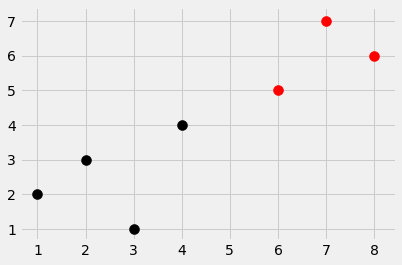

In [11]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import warnings
from matplotlib import style
from collections import Counter
style.use('fivethirtyeight')

dataset = {'k':[[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}
new_features = [4,4]

def k_nearest_neighbors(data, predict, k =3):
    if len(data) >= k:
        warning.warn('K is set to a value less that total voting groups!')
    #RADIUS
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance, group])
    votes = [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    
    confidence = Counter(votes).most_common(1)[0][1] / k
    
    return vote_result,confidence

result = k_nearest_neighbors(dataset, new_features, k =3)
#print(result)
[[plt.scatter(ii[0],ii[1], s=100, color=i)for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0],new_features[1], s=100,color = result)
plt.show()
#ADDED stuff
import pandas as pd
import random

accuracies = []
for i in range(25):

    df = pd.read_csv("breas-cancer-wisconsin.data.txt")
    df.replace('?',-99999, inplace=True)
    df.drop(['id'], 1, inplace=True)

    full_data = df.astype(float).values.tolist()
    #cuz sometimes values has quotes

    random.shuffle(full_data)

    test_size = 0.2
    train_set = {2:[],4:[]}
    test_set = {2:[],4:[]}
    train_data = full_data[:-int(test_size*len(full_data))]
    test_data = full_data[-int(test_size*len(full_data)):]

    for i in train_data:
        train_set[i[-1]].append(i[:-1])
    for i in test_data:
        test_set[i[-1]].append(i[:-1])

    correct = 0
    total = 0

    for group in test_set:
        for data in test_set[group]:
            vote,confidence = k_nearest_neighbors(train_set, data, k=5)
            if group == vote:
                correct += 1
            else:
                #print(confidence)
            total+=1
    #print('Accuracy:',correct/total)
    accuracies.append(correct/total)
print(sum(accuracies)/len(accuracies))